# Note by me - the original code commented and I have re-written the code.

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [1]:
# from tensorflow.keras.datasets import mnist
# (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# train_images.shape

# len(train_labels)

# train_labels

# test_images.shape

# len(test_labels)

# test_labels

In [4]:
train_images.shape
train_images[0].shape

(28, 28)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

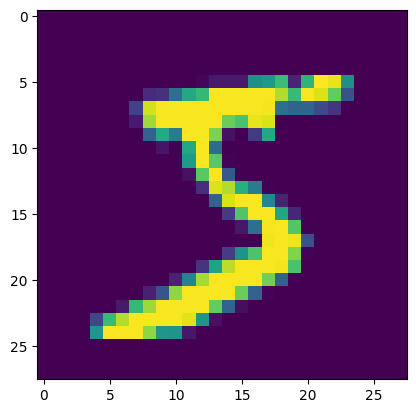

In [6]:

from PIL import Image
img = Image.fromarray(train_images[0])
# first way
plt.imshow(img)

# second way - not working. Need to debug later.
# from IPython.display import display #, Image
# from IPython.display import Image as ipy_Image

# display( ipy_Image(img.resize(56,56,resample=Resampling.BICUBIC) ) ) # width=28, height=28) )

### Check this for the various colormaps available -
https://matplotlib.org/stable/gallery/color/colormap_reference.html

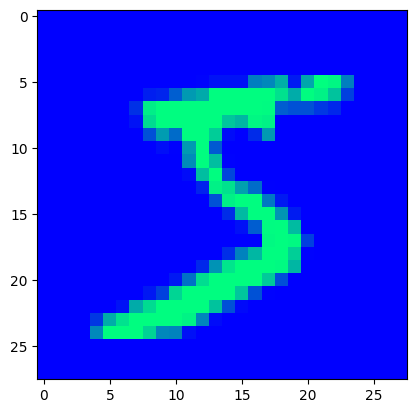

In [7]:
plt.imshow(img, cmap=plt.cm.binary)
plt.imshow(img, cmap=plt.cm.binary_r)
plt.imshow(img, cmap=plt.cm.Accent)
plt.imshow(img, cmap=plt.cm.autumn)
plt.imshow(img, cmap=plt.cm.winter)


**The network architecture**

In [8]:
# from tensorflow import keras
# from tensorflow.keras import layers
# model = keras.Sequential([
#     layers.Dense(512, activation="relu"),
#     layers.Dense(10, activation="softmax")
# ])

In [9]:
train_labels.tolist()[:25]

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1, 1]

In [10]:
num_classes = len(set(train_labels.tolist()).union(set(test_labels.tolist())) )

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential( [
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax'),    
])

2023-08-18 23:42:21.657320: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-18 23:42:22.009813: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6138 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


**The compilation step**

In [12]:
# model.compile(optimizer="rmsprop",
#               loss="sparse_categorical_crossentropy",
#               metrics=["accuracy"])

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

**Preparing the image data**

In [14]:
# train_images = train_images.reshape((60000, 28 * 28))
# train_images = train_images.astype("float32") / 255
# test_images = test_images.reshape((10000, 28 * 28))
# test_images = test_images.astype("float32") / 255

In [15]:
train_images = train_images.reshape( (train_images.shape[0],-1) )
test_images = test_images.reshape( (test_images.shape[0],-1) )


In [16]:
train_images.shape
train_labels.shape

(60000,)

**"Fitting" the model**

In [17]:
# model.fit(train_images, train_labels, epochs=5, batch_size=128)

In [18]:
1024*64

65536

In [19]:
model.fit(train_images, train_labels,batch_size=128, epochs=2)
# note that since the data size is very small, batch size of 65536 or 60000 also works

2023-08-18 23:42:22.206236: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/2
187/469 [==========>...................] - ETA: 0s - loss: 9.9513 - accuracy: 0.8636  

2023-08-18 23:42:22.798174: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


469/469 [==============================] - 1s 807us/step - loss: 5.1875 - accuracy: 0.9042
Epoch 2/2
469/469 [==============================] - 0s 780us/step - loss: 0.7156 - accuracy: 0.9564


**Using the model to make predictions**

In [20]:
# test_digits = test_images[0:10]
# predictions = model.predict(test_digits)
# predictions[0]

In [21]:
predictions = model.predict(test_images)

In [22]:
predictions.shape
pred = predictions.argmax(axis=1)
pred.shape
test_labels.shape

(10000,)

In [23]:
len(pred)

10000

In [24]:
import numpy as np
print("accuracy = ", 100*np.sum(pred == test_labels)/len(pred) )

accuracy =  94.35


In [25]:
# predictions[0].argmax()

# predictions[0][7]

# test_labels[0]

**Evaluating the model on new data**

In [26]:
# test_loss, test_acc = model.evaluate(test_images, test_labels)
# print(f"test_acc: {test_acc}")

### Note that evaluate() returns the loss and accuracy automatically based on the loss and accuracy passed in the compile() func.

In [27]:
test_results = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 576us/step - loss: 0.8532 - accuracy: 0.9435


In [28]:
test_results

[0.853179395198822, 0.9434999823570251]

## Data representations for neural networks

### Scalars (rank-0 tensors)

In [29]:
# import numpy as np
# x = np.array(12)
# x

In [30]:
# x.ndim

In [31]:
x = np.array(12221213)
x
x.shape
x.ndim

0

### Vectors (rank-1 tensors)

In [32]:
# x = np.array([12, 3, 6, 14, 7])
# x

In [33]:
# x.ndim

In [34]:
y = np.array([423425])
y
y.shape
y.ndim

z = np.array([1,2,3,4,5])
z
z.shape
z.ndim

1

### Matrices (rank-2 tensors)

In [35]:
# x = np.array([[5, 78, 2, 34, 0],
#               [6, 79, 3, 35, 1],
#               [7, 80, 4, 36, 2]])
# x.ndim

In [36]:
x = np.array([
    [1,2,3],
    [4,5,6],
])
x.shape
x.ndim

2

### Rank-3 and higher-rank tensors

In [37]:
# x = np.array([[[5, 78, 2, 34, 0],
#                [6, 79, 3, 35, 1],
#                [7, 80, 4, 36, 2]],
#               [[5, 78, 2, 34, 0],
#                [6, 79, 3, 35, 1],
#                [7, 80, 4, 36, 2]],
#               [[5, 78, 2, 34, 0],
#                [6, 79, 3, 35, 1],
#                [7, 80, 4, 36, 2]]])
# x.ndim

In [38]:
x = np.array([
    [
        [1,2,3],
        [11,12,13],
        [21,22,23],
        [31,32,33]
    ],
    [
        [4,5,6],
        [14,15,16],
        [24,25,26],
        [34,35,36]
    ]
])
# 2 x 4 x 3
x.shape
x.ndim

3

### Key attributes

In [39]:
# from tensorflow.keras.datasets import mnist
# (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# train_images.ndim

# train_images.shape

# train_images.dtype

In [40]:
# Load again to do some more operations on the original data
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [41]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

In [42]:
# import matplotlib.pyplot as plt
# digit = train_images[4]
# plt.imshow(digit, cmap=plt.cm.binary )
# plt.show()

In [43]:
# train_labels[4]

2


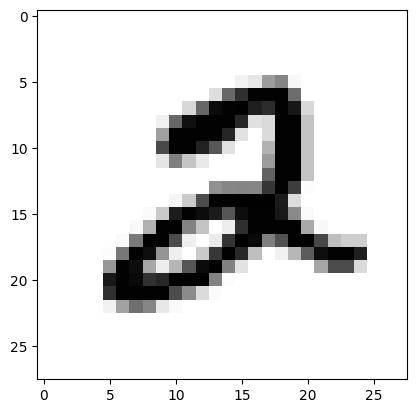

In [44]:
digit = train_images[5]

plt.imshow(digit, cmap=plt.cm.binary )
print(train_labels[5])
plt.show()


### Manipulating tensors in NumPy

In [45]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [46]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [47]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [48]:
my_slice = train_images[:, 14:, 14:]

In [49]:
my_slice = train_images[:, 7:-7, 7:-7]

### The notion of data batches

In [50]:
batch = train_images[:128]

In [51]:
batch = train_images[128:256]

In [52]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [53]:
max?


Docstring:
max(iterable, *[, default=obj, key=func]) -> value
max(arg1, arg2, *args, *[, key=func]) -> value

With a single iterable argument, return its biggest item. The
default keyword-only argument specifies an object to return if
the provided iterable is empty.
With two or more arguments, return the largest argument.
Type:      builtin_function_or_method


In [54]:
# def naive_relu(x):
#     assert len(x.shape) == 2
#     x = x.copy()
#     for i in range(x.shape[0]):
#         for j in range(x.shape[1]):
#             x[i, j] = max(x[i, j], 0)
#     return x

In [55]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] = np.max(x[i,j],0)
    return x

In [56]:
naive_relu?

Signature: naive_relu(x)
Docstring: <no docstring>
File:      /tmp/ipykernel_51983/56559502.py
Type:      function


In [57]:
# def naive_add(x, y):
#     assert len(x.shape) == 2
#     assert x.shape == y.shape
#     x = x.copy()
#     for i in range(x.shape[0]):
#         for j in range(x.shape[1]):
#             x[i, j] += y[i, j]
#     return x

In [58]:
def naive_add(x, y):
    assert x.shape == y.shape
    assert len(x.shape) == 2
    
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] = x[i,j] + y[i,j]
    return x

In [59]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.00 s


In [60]:
import time

x = np.random.random((10,50))
y = np.random.random((10,50))

start = time.time()

for loop in range(10000):
    z = x + y
    z = np.maximum(z,0.)
print("time taken = ", time.time() - start)

time taken =  0.011595010757446289


In [61]:
# t0 = time.time()
# for _ in range(1000):
#     z = naive_add(x, y)
#     z = naive_relu(z)
# print("Took: {0:.2f} s".format(time.time() - t0))

In [62]:
start = time.time()
for loop in range(10000):
    z = naive_add(x,y)
    z = naive_relu(z)
print("time taken = ", time.time() - start)

time taken =  15.66649603843689


### Broadcasting

In [63]:
# import numpy as np
# X = np.random.random((32, 10))
# y = np.random.random((10,))
# y = np.expand_dims(y, axis=0)
y = np.concatenate([y] * 32, axis=0)

In [64]:
x = np.random.random((20,50))
y = np.random.random(50)

In [65]:
y = np.expand_dims(y,axis=0)

In [66]:
y.shape

(1, 50)

In [67]:
y_concat = np.concatenate([y]*20,axis=0)

In [68]:
# def naive_add_matrix_and_vector(x, y):
#     assert len(x.shape) == 2
#     assert len(y.shape) == 1
#     assert x.shape[1] == y.shape[0]
#     x = x.copy()
#     for i in range(x.shape[0]):
#         for j in range(x.shape[1]):
#             x[i, j] += y[j]
#     return x

In [69]:
def naive_add_mat_vec(x,y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert ( (x.shape[0] == y.shape[0]) | (x.shape[1] == y.shape[0]) )
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if x.shape[1] == y.shape[0]:
                x[i,j] += y[j]
            else:
                x[i,j] += y[i]
    return x                

In [70]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product

In [71]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [72]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [73]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [74]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [75]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [76]:
train_images = train_images.reshape((60000, 28 * 28))

In [77]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [78]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [79]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [80]:
# import tensorflow as tf
# x = tf.Variable(0.)
# with tf.GradientTape() as tape:
#     y = 2 * x + 3
# grad_of_y_wrt_x = tape.gradient(y, x)

In [81]:
import tensorflow as tf
x = tf.Variable(15.)
y = tf.Variable(3.4)
with tf.GradientTape() as tape:
    y = 2.5*x + 43
y_grad_wrt_x = tape.gradient(y,x)

In [82]:
y_grad_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=2.5>

### Added by me - Note -this gives an error - stating "A non-persistent GradientTape can only be used to compute one set of gradients (or jacobians)"

In [83]:
# x_grad_wrt_y = tape.gradient(x,y)

In [84]:
# x = tf.Variable(tf.random.uniform((2, 2)))
# with tf.GradientTape() as tape:
#     y = 2 * x + 3
# grad_of_y_wrt_x = tape.gradient(y, x)

In [85]:
x = tf.Variable(tf.random.uniform((2,2)))
with tf.GradientTape() as tape:
    y = 2.3*x + 17
y_grad_wrt_x = tape.gradient(y,x)
y_grad_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2.3, 2.3],
       [2.3, 2.3]], dtype=float32)>

In [86]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

In [87]:
grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0.91967773, 0.91967773],
        [1.1431885 , 1.1431885 ]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

In [88]:
tf.random.uniform((2,2))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.5871979 , 0.14249718],
       [0.422835  , 0.98867226]], dtype=float32)>

In [89]:
w = tf.Variable(tf.random.uniform((2,2)))
b = tf.Variable(tf.zeros(2,))
x = tf.random.uniform((2,2))

with tf.GradientTape() as tape:
    y = tf.matmul(w,x) + b
dy_dx = tape.gradient(y,[w,b])
dy_dx

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1.3994141, 0.8654785],
        [1.3994141, 0.8654785]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

In [90]:
x


<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.7493285 , 0.64987457],
       [0.50551546, 0.36007297]], dtype=float32)>

In [91]:
x[0,0].numpy() + x[0,1].numpy()
x[1,0].numpy() + x[1,1].numpy()


0.8655884

# Added by me - vvvvImp & Good - </br> How the derivative is calculated -

In [92]:
x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.7493285 , 0.64987457],
       [0.50551546, 0.36007297]], dtype=float32)>

In [93]:
dw00 = np.array( [ [1, 0],
              [0, 0] ])

In [94]:
x.numpy()

array([[0.7493285 , 0.64987457],
       [0.50551546, 0.36007297]], dtype=float32)

In [95]:
dw00
dw00[0,0]
dw00.shape

(2, 2)

In [96]:
dw00*x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.7493285, 0.       ],
       [0.       , 0.       ]], dtype=float32)>

In [97]:
dy_dw00 = tf.math.reduce_sum(tf.matmul(tf.Variable(1.*dw00), x.numpy()))

In [98]:
dy_dw00

<tf.Tensor: shape=(), dtype=float64, numpy=1.3992030620574951>

## Looking back at our first example

In [99]:
# (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# train_images = train_images.reshape((60000, 28 * 28))
# train_images = train_images.astype("float32") / 255
# test_images = test_images.reshape((10000, 28 * 28))
# test_images = test_images.astype("float32") / 255

In [100]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], train_images.shape[1]*train_images.shape[2])
train_images = train_images.astype("float32")/255.
test_images = test_images.reshape(test_images.shape[0], test_images.shape[1]*test_images.shape[2])
test_images = test_images.astype("float32")/255.


In [101]:
train_images.shape

(60000, 784)

In [102]:
# model = keras.Sequential([
#     layers.Dense(512, activation="relu"),
#     layers.Dense(10, activation="softmax")
# ])

In [103]:
model = keras.Sequential( [
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [104]:
# model.compile(optimizer="rmsprop",
#               loss="sparse_categorical_crossentropy",
#               metrics=["accuracy"])

In [105]:
model.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

In [106]:
# model.fit(train_images, train_labels, epochs=5, batch_size=128)

In [107]:
model.fit(train_images, train_labels, batch_size=256, epochs = 10)

Epoch 1/10
235/235 [==============================] - 0s 1ms/step - loss: 0.3718 - accuracy: 0.8982
Epoch 2/10
235/235 [==============================] - 0s 1ms/step - loss: 0.1686 - accuracy: 0.9517
Epoch 3/10
235/235 [==============================] - 0s 1ms/step - loss: 0.1188 - accuracy: 0.9664
Epoch 4/10
235/235 [==============================] - 0s 1ms/step - loss: 0.0904 - accuracy: 0.9739
Epoch 5/10
235/235 [==============================] - 0s 1ms/step - loss: 0.0726 - accuracy: 0.9791
Epoch 6/10
235/235 [==============================] - 0s 1ms/step - loss: 0.0580 - accuracy: 0.9835
Epoch 7/10
235/235 [==============================] - 0s 1ms/step - loss: 0.0476 - accuracy: 0.9868
Epoch 8/10
235/235 [==============================] - 0s 1ms/step - loss: 0.0401 - accuracy: 0.9891
Epoch 9/10
235/235 [==============================] - 0s 1ms/step - loss: 0.0329 - accuracy: 0.9914
Epoch 10/10
235/235 [==============================] - 0s 1ms/step - loss: 0.0285 - accuracy: 0.9925

### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [108]:
# import tensorflow as tf

# class NaiveDense:
#     def __init__(self, input_size, output_size, activation):
#         self.activation = activation

#         w_shape = (input_size, output_size)
#         w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
#         self.W = tf.Variable(w_initial_value)

#         b_shape = (output_size,)
#         b_initial_value = tf.zeros(b_shape)
#         self.b = tf.Variable(b_initial_value)

#     def __call__(self, inputs):
#         return self.activation(tf.matmul(inputs, self.W) + self.b)

#     @property
#     def weights(self):
#         return [self.W, self.b]

In [109]:
# Note - comma needs to be added at the end of single channel tuple or provide list instead
tf.random.uniform((256,), minval=1e-4, maxval=1e-1)
tf.random.uniform([256], minval=1e-4, maxval=1e-1)
(256,)
((256,),)

((256,),)

In [110]:
class NaiveDense:
    def __init__(self, input_nodes, output_nodes=256, activation=tf.nn.relu):
        self.activation = activation
         
        self.w = tf.Variable( tf.random.uniform( (input_nodes, output_nodes), minval=1e-4, maxval=1e-1) )
        self.b = tf.Variable( tf.random.uniform((output_nodes,), minval=1e-4, maxval=1e-1))
    
    def __call__(self, x):
        return self.activation( tf.matmul(x, self.w) + self.b )
    
    @property
    def weights(self):
        return [self.w, self.b]

#### A simple Sequential class

In [111]:
# class NaiveSequential:
#     def __init__(self, layers):
#         self.layers = layers

#     def __call__(self, inputs):
#         x = inputs
#         for layer in self.layers:
#            x = layer(x)
#         return x

#     @property
#     def weights(self):
#        weights = []
#        for layer in self.layers:
#            weights += layer.weights
#        return weights

In [112]:
class NaiveSequential:
    # called when class object is connstructed i.e. NaiveSequential( <layers_passed_here>)
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, x):
        for l in self.layers:
            x = l(x)
        return x

    @property
    def weights(self):
        weights = []
        for l in self.layers:
            weights.append(l.weights)
        return weights

In [113]:
# model = NaiveSequential([
#     NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
#     NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
# ])
# assert len(model.weights) == 4

In [114]:
train_images.shape[1]

784

In [115]:
set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [116]:
num_nodes = 256
model = NaiveSequential([
    NaiveDense(train_images.shape[1], num_nodes, tf.nn.relu),
    NaiveDense(num_nodes, len(set(train_labels)), tf.nn.softmax),    
])

#### A batch generator

In [117]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

In [118]:
# train_images.reshape(128,-1,784).shape
batch_size = 128
num_batches = int(train_images.shape[0]/batch_size)
train_images_batches = train_images[:num_batches*batch_size].reshape(num_batches, batch_size, -1)
train_images_batches.shape
# train_images[num_batches*batch_size:].reshape[]

# Note - if index exceeded, it falls back to the last index
train_images[59990:61000].shape

(10, 784)

In [119]:
class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
 
        self.idx = 0
        # math ceil implementation
        self.num_batches = int( (self.images.shape[0]+batch_size-1)/batch_size )
    
    def next(self):
        self.idx+=1
        return self.images[(self.idx-1)*self.batch_size:self.idx*self.batch_size], self.labels[(self.idx-1)*self.batch_size:self.idx*self.batch_size]
        

### Running one training step

In [120]:
# def one_training_step(model, images_batch, labels_batch):
#     with tf.GradientTape() as tape:
#         predictions = model(images_batch)
#         per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
#             labels_batch, predictions)
#         average_loss = tf.reduce_mean(per_sample_losses)
#     gradients = tape.gradient(average_loss, model.weights)
#     update_weights(gradients, model.weights)
#     return average_loss

In [121]:
def training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        # print("before preds")
        preds = model(images_batch)
        # print("after preds")
        # print("before losses_batch")
        losses_batch = tf.losses.sparse_categorical_crossentropy(labels_batch, preds)
        # print("after losses_batch")
        loss = tf.reduce_mean(losses_batch)
    grads = tape.gradient(loss, model.weights)
    update_weights(grads, model.weights)
    # update_wts(grads, model.weights)
    return loss

In [122]:
# learning_rate = 1e-3

# def update_weights(gradients, weights):
#     for g, w in zip(gradients, weights):
#         w.assign_sub(g * learning_rate)

In [123]:
# tf.Variable.assign_sub?

# NOTE -modified the below code. Doesn't work with even the recommended tf v2.6 (by FChollet). Added for loop to iterate over a list()

In [124]:
lr = 1e-3

def update_weights(grads, wts):
    for g,w in zip(grads,wts):
        # print( type(grads[0]) )
        # print( type(wts[0]) )
        # print( type(w[0]) )
        # print( type(g[0]) )
        
        for g0,w0 in zip(g,w):
            w0.assign_sub(lr*g0)
        # w.assign_sub(lr*g)

In [125]:
# from tensorflow.keras import optimizers

# optimizer = optimizers.SGD(learning_rate=1e-3)

# def update_weights(gradients, weights):
#     optimizer.apply_gradients(zip(gradients, weights))

In [126]:
from tensorflow.keras import optimizers

optimizer = optimizers.Adam(learning_rate=1e-3, beta_1=0.9, beta_2=.999)

def update_wts(grads, wts):
    optimizer.apply_gradients( zip(grads,wts) )
    

### The full training loop

In [127]:
# def fit(model, images, labels, epochs, batch_size=128):
#     for epoch_counter in range(epochs):
#         print(f"Epoch {epoch_counter}")
#         batch_generator = BatchGenerator(images, labels)
#         for batch_counter in range(batch_generator.num_batches):
#             images_batch, labels_batch = batch_generator.next()
#             loss = one_training_step(model, images_batch, labels_batch)
#             if batch_counter % 100 == 0:
#                 print(f"loss at batch {batch_counter}: {loss:.2f}")

In [128]:
def fit(model, images, labels, epochs=5, batch_size=128):
    for e in range(epochs):
        batch_gen = BatchGenerator(images, labels)
        for b in range(batch_gen.num_batches):
            b_imgs, b_labels = batch_gen.next()
            loss = training_step(model, b_imgs, b_labels)
            if b%100 == 0:
                print(f"loss at batch number {b} = {loss:.2f}")
            

In [129]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

loss at batch number 0 = 4.58
loss at batch number 100 = 2.26
loss at batch number 200 = 2.22
loss at batch number 300 = 2.18
loss at batch number 400 = 2.17
loss at batch number 0 = 2.08
loss at batch number 100 = 2.07
loss at batch number 200 = 2.01
loss at batch number 300 = 1.98
loss at batch number 400 = 1.97
loss at batch number 0 = 1.88
loss at batch number 100 = 1.89
loss at batch number 200 = 1.81
loss at batch number 300 = 1.77
loss at batch number 400 = 1.78
loss at batch number 0 = 1.68
loss at batch number 100 = 1.70
loss at batch number 200 = 1.60
loss at batch number 300 = 1.57
loss at batch number 400 = 1.59
loss at batch number 0 = 1.48
loss at batch number 100 = 1.51
loss at batch number 200 = 1.40
loss at batch number 300 = 1.38
loss at batch number 400 = 1.41
loss at batch number 0 = 1.30
loss at batch number 100 = 1.34
loss at batch number 200 = 1.23
loss at batch number 300 = 1.22
loss at batch number 400 = 1.26
loss at batch number 0 = 1.15
loss at batch number 1

### Evaluating the model

In [130]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.80


In [139]:
preds = model(test_images)

In [147]:
print(type(preds))
preds_np = preds.numpy()
preds_np
preds_labels = np.argmax(preds, axis=1)
print("accuracy = {}".format( 100*(preds_labels==test_labels).mean() )  )

# This is interesting - operationon variable can also be done in the print string -
print(f"accuracy = { 100*(preds_labels==test_labels).mean() }" )


<class 'tensorflow.python.framework.ops.EagerTensor'>
accuracy = 80.04
accuracy = 80.04


## Summary